In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score, balanced_accuracy_score,
                             cohen_kappa_score, precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
wisc = pd.read_csv("E:/Python Programs/wisc_bc_data.csv")
wisc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
X = wisc[["radius_mean", "concavity_mean", "concave points_mean"]]
y = wisc["diagnosis"]

In [5]:
X.describe()

,radius_mean,concavity_mean,concave points_mean
count,569.000000,569.000000,569.000000
mean,14.127292,0.088799,0.048919
std,3.524049,0.079720,0.038803
min,6.981000,0.000000,0.000000
25%,11.700000,0.029560,0.020310
50%,13.370000,0.061540,0.033500
75%,15.780000,0.130700,0.074000
max,28.110000,0.426800,0.201200


In [6]:
# scaling the data

X_scaled = pd.DataFrame(minmax_scale(X), columns=X.columns)
X_scaled.describe()

,radius_mean,concavity_mean,concave points_mean
count,569.000000,569.000000,569.000000
mean,0.338222,0.208058,0.243137
std,0.166787,0.186785,0.192857
min,0.000000,0.000000,0.000000
25%,0.223342,0.069260,0.100944
50%,0.302381,0.144189,0.166501
75%,0.416442,0.306232,0.367793
max,1.000000,1.000000,1.000000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=10, stratify=y)
X_train.shape, X_test.shape

((426, 3), (143, 3))

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=9, weights="distance")
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [14]:
# Original predicted values by the model

knn_prob = knn_model.predict_proba(X_test)
knn_y_predict = knn_model.predict(X_test)
knn_y_predict

array(['B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B'],
      dtype=object)

In [15]:
knn_prob[:5]

array([[1.        , 0.        ],
       [0.77354365, 0.22645635],
       [0.36629757, 0.63370243],
       [1.        , 0.        ],
       [1.        , 0.        ]])

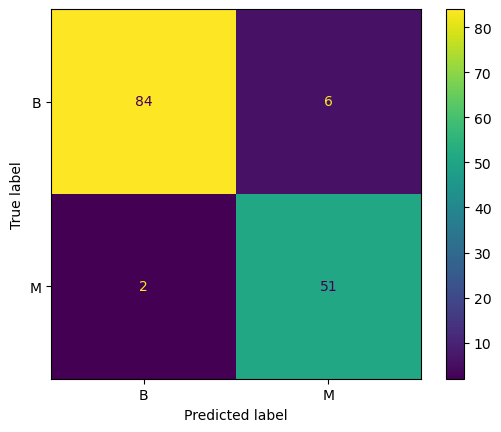

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_predict)
plt.show()

In [20]:
knn_results = pd.DataFrame({"actual": y_test, "predicted": knn_y_predict, "prob_M": knn_prob[:,1], 
                            "prob_B": knn_prob[:,0]})
knn_results[:5]

,actual,predicted,prob_M,prob_B
60,B,B,0.000000,1.000000
523,B,B,0.226456,0.773544
261,M,M,0.633702,0.366298
342,B,B,0.000000,1.000000
480,B,B,0.000000,1.000000


In [19]:
knn_results[knn_results.actual != knn_results.predicted]

,actual,predicted,prob_M,prob_B
38,M,B,0.000000,1.000000
423,B,M,0.594314,0.405686
491,B,M,0.773212,0.226788
157,B,M,0.636460,0.363540
290,B,M,0.774895,0.225105
112,B,M,1.000000,0.000000
31,M,B,0.341679,0.658321
128,B,M,0.893646,0.106354


In [21]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_results.prob_M, pos_label="M")
fpr_knn, tpr_knn, thresholds_knn

(array([0.        , 0.01111111, 0.02222222, 0.02222222, 0.04444444,
        0.04444444, 0.05555556, 0.05555556, 0.06666667, 0.06666667,
        0.08888889, 0.08888889, 0.3       , 1.        ]),
 array([0.        , 0.75471698, 0.75471698, 0.83018868, 0.83018868,
        0.88679245, 0.88679245, 0.9245283 , 0.9245283 , 0.96226415,
        0.96226415, 0.98113208, 0.98113208, 1.        ]),
 array([2.        , 1.        , 0.89364624, 0.83641682, 0.77321196,
        0.66545468, 0.63645956, 0.59837097, 0.59431394, 0.57177172,
        0.44641785, 0.34167926, 0.07524613, 0.        ]))

['B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B']


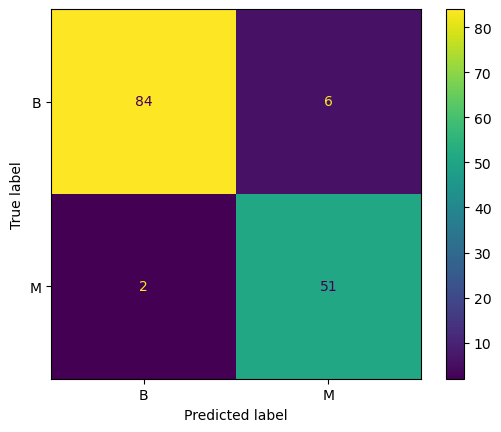

In [70]:
# Manually tuning our model for ">=0.56 threshold" and plotting the Confusion Matrix.
# Note:- You can take any threshold value from the above list and tune your model for better performance.

knn_y_predict_tuned = ["M" if p>=0.56 else "B" for p in knn_results.prob_M]
print(knn_y_predict_tuned)
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_predict_tuned)
plt.show()

In [71]:
# Calculating TPR & FPR value after tuning the model. 
# Please match the results with the ROC curve values above.

51/53, 6/90

(0.9622641509433962, 0.06666666666666667)

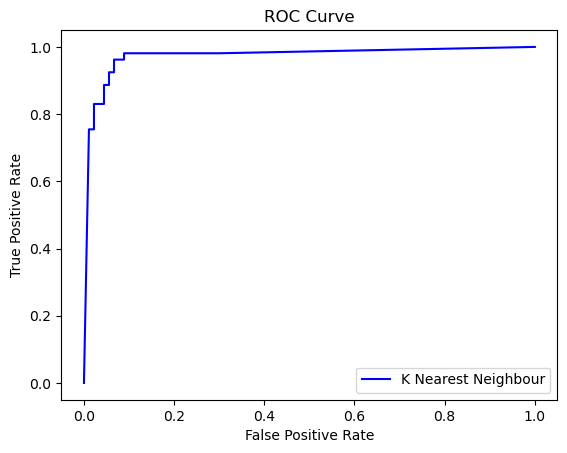

In [72]:
plt.plot(fpr_knn, tpr_knn, c='blue', label="K Nearest Neighbour")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [73]:
print("accuracy score: ", accuracy_score(y_test, knn_y_predict))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, knn_y_predict))
print("kappa score: ", cohen_kappa_score(y_test, knn_y_predict))
print("precision: ", precision_score(y_test, knn_y_predict, pos_label="M"))
print("recall: ", recall_score(y_test, knn_y_predict, pos_label="M"))
print("f1 score: ", f1_score(y_test, knn_y_predict, pos_label="M"))
print("AUC score: ", auc(fpr_knn, tpr_knn))

accuracy score:  0.9440559440559441
balanced accuracy score:  0.9477987421383648
kappa score:  0.8819157720891825
precision:  0.8947368421052632
recall:  0.9622641509433962
f1 score:  0.9272727272727272
AUC score:  0.9730607966457023


In [74]:
print("accuracy score: ", accuracy_score(y_test, knn_y_predict_tuned))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, knn_y_predict_tuned))
print("kappa score: ", cohen_kappa_score(y_test, knn_y_predict_tuned))
print("precision: ", precision_score(y_test, knn_y_predict_tuned, pos_label="M"))
print("recall: ", recall_score(y_test, knn_y_predict_tuned, pos_label="M"))
print("f1 score: ", f1_score(y_test, knn_y_predict_tuned, pos_label="M"))
print("AUC score: ", auc(fpr_knn, tpr_knn))

accuracy score:  0.9440559440559441
balanced accuracy score:  0.9477987421383648
kappa score:  0.8819157720891825
precision:  0.8947368421052632
recall:  0.9622641509433962
f1 score:  0.9272727272727272
AUC score:  0.9730607966457023


In [30]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
dt_model.get_depth(), dt_model.get_n_leaves()

(13, 34)

In [33]:
# Original predicted values by the model

dt_prob = dt_model.predict_proba(X_test)
dt_y_predict = dt_model.predict(X_test)
dt_y_predict

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B'],
      dtype=object)

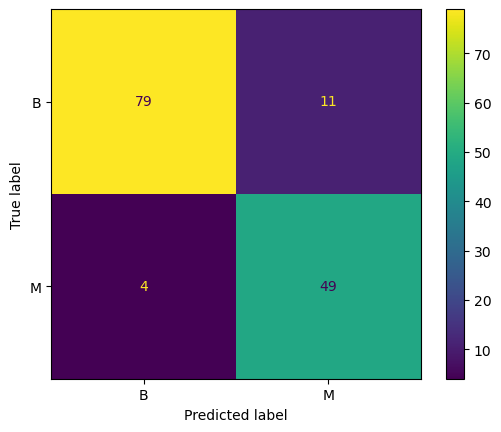

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_predict)
plt.show()

In [43]:
dt_prob[:15]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [36]:
dt_results = pd.DataFrame({"actual": y_test, "predicted": dt_y_predict, "prob_M": dt_prob[:,1], 
                            "prob_B": dt_prob[:,0]})
dt_results[:5]

,actual,predicted,prob_M,prob_B
60,B,B,0.0,1.0
523,B,M,1.0,0.0
261,M,M,1.0,0.0
342,B,B,0.0,1.0
480,B,B,0.0,1.0


In [37]:
dt_results[dt_results.actual != dt_results.predicted]

,actual,predicted,prob_M,prob_B
523,B,M,1.0,0.0
38,M,B,0.0,1.0
423,B,M,1.0,0.0
472,B,M,1.0,0.0
491,B,M,1.0,0.0
157,B,M,1.0,0.0
290,B,M,1.0,0.0
406,B,M,1.0,0.0
91,M,B,0.0,1.0
112,B,M,1.0,0.0


In [38]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_results.prob_M, pos_label="M")
fpr_dt, tpr_dt, thresholds_dt

(array([0.        , 0.12222222, 1.        ]),
 array([0.       , 0.9245283, 1.       ]),
 array([2., 1., 0.]))

['B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B']


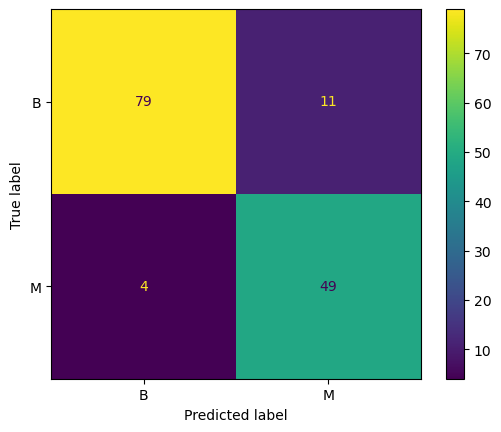

In [75]:
# Manually tuning our model for ">=1 threshold" and plotting the Confusion Matrix.
# Note:- You can take any threshold value from the above list and tune your model for better performance.

dt_y_predict_tuned = ["M" if p>=0.8 else "B" for p in dt_results.prob_M]
print(dt_y_predict_tuned)
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_predict_tuned)
plt.show()

In [45]:
# Calculating TPR & FPR value manually after tuning the model. 
# Please match the results with the ROC curve values above.

49/53, 11/90

(0.9245283018867925, 0.12222222222222222)

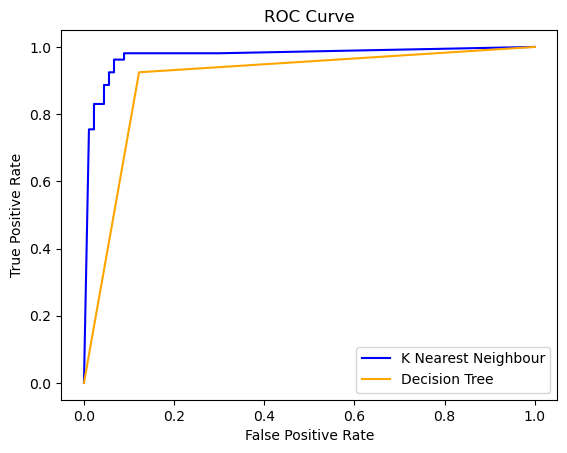

In [50]:
plt.plot(fpr_knn, tpr_knn, c='blue', label="K Nearest Neighbour")
plt.plot(fpr_dt, tpr_dt, c='orange', label="Decision Tree")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [52]:
print("accuracy score: ", accuracy_score(y_test, dt_y_predict))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, dt_y_predict))
print("kappa score: ", cohen_kappa_score(y_test, dt_y_predict))
print("precision: ", precision_score(y_test, dt_y_predict, pos_label="M"))
print("recall: ", recall_score(y_test, dt_y_predict, pos_label="M"))
print("f1 score: ", f1_score(y_test, dt_y_predict, pos_label="M"))
print("AUC score: ", auc(fpr_dt, tpr_dt))

accuracy score:  0.8951048951048951
balanced accuracy score:  0.9011530398322851
kappa score:  0.7811001122563527
precision:  0.8166666666666667
recall:  0.9245283018867925
f1 score:  0.8672566371681416
AUC score:  0.9011530398322851


In [76]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [77]:
# Original predicted values by the model

lr_prob = lr_model.predict_proba(X_test)
lr_y_predict = lr_model.predict(X_test)
lr_y_predict

array(['B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B'],
      dtype=object)

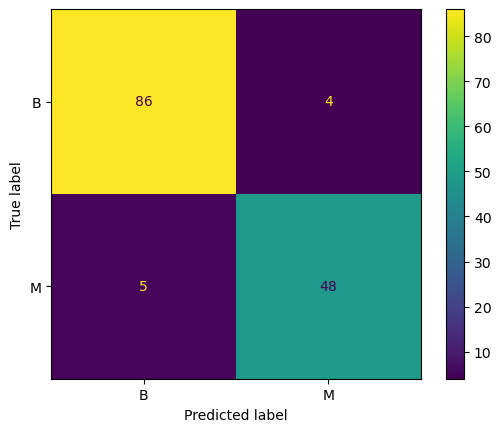

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_predict)
plt.show()

In [78]:
lr_prob[:15]

array([[0.95221404, 0.04778596],
       [0.77364462, 0.22635538],
       [0.70205073, 0.29794927],
       [0.87301569, 0.12698431],
       [0.91162508, 0.08837492],
       [0.31804147, 0.68195853],
       [0.25185395, 0.74814605],
       [0.80402976, 0.19597024],
       [0.65175207, 0.34824793],
       [0.95969519, 0.04030481],
       [0.93612156, 0.06387844],
       [0.87022256, 0.12977744],
       [0.90605278, 0.09394722],
       [0.89633827, 0.10366173],
       [0.74684383, 0.25315617]])

In [80]:
lr_results = pd.DataFrame({"actual": y_test, "predicted": lr_y_predict, "prob_M": lr_prob[:,1], 
                            "prob_B": lr_prob[:,0]})
lr_results[:5]

,actual,predicted,prob_M,prob_B
60,B,B,0.047786,0.952214
523,B,B,0.226355,0.773645
261,M,B,0.297949,0.702051
342,B,B,0.126984,0.873016
480,B,B,0.088375,0.911625


In [82]:
lr_results[lr_results.actual != lr_results.predicted]

,actual,predicted,prob_M,prob_B
261,M,B,0.297949,0.702051
38,M,B,0.195970,0.804030
290,B,M,0.577602,0.422398
112,B,M,0.877203,0.122797
39,M,B,0.393670,0.606330
10,M,B,0.268605,0.731395
31,M,B,0.325380,0.674620
128,B,M,0.678283,0.321717
68,B,M,0.518288,0.481712


In [83]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_results.prob_M, pos_label="M")
fpr_lr, tpr_lr, thresholds_lr

(array([0.        , 0.        , 0.        , 0.01111111, 0.01111111,
        0.02222222, 0.02222222, 0.03333333, 0.03333333, 0.04444444,
        0.04444444, 0.05555556, 0.05555556, 0.12222222, 0.12222222,
        0.13333333, 0.13333333, 0.14444444, 0.14444444, 0.21111111,
        0.21111111, 1.        ]),
 array([0.        , 0.01886792, 0.41509434, 0.41509434, 0.71698113,
        0.71698113, 0.83018868, 0.83018868, 0.88679245, 0.88679245,
        0.90566038, 0.90566038, 0.9245283 , 0.9245283 , 0.94339623,
        0.94339623, 0.96226415, 0.96226415, 0.98113208, 0.98113208,
        1.        , 1.        ]),
 array([1.9993668 , 0.9993668 , 0.88254006, 0.87720327, 0.68195853,
        0.67828307, 0.57975842, 0.57760221, 0.54436279, 0.51828837,
        0.50809283, 0.42865671, 0.3936697 , 0.32956351, 0.32538   ,
        0.31111015, 0.29794927, 0.29145242, 0.26860508, 0.21190867,
        0.19597024, 0.02369019]))

['B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B']


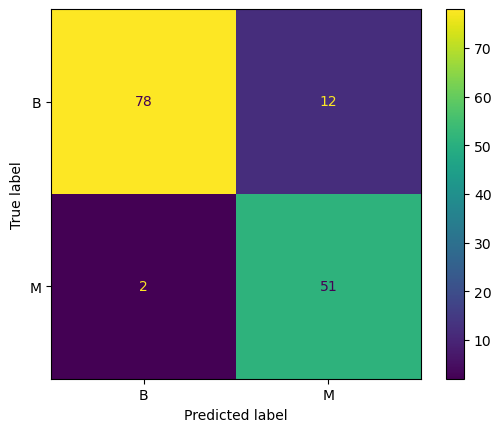

In [90]:
# Manually tuning our model for ">=0.29794927 threshold" and plotting the Confusion Matrix.
# Note:- You can take any threshold value from the above list and tune your model for better performance.

lr_y_predict_tuned = ["M" if p>=0.29794927 else "B" for p in lr_results.prob_M]
print(lr_y_predict_tuned)
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_predict_tuned)
plt.show()

In [91]:
# Calculating TPR & FPR value manually after tuning the model. 
# Please match the results with the ROC curve values above.

51/53, 12/90

(0.9622641509433962, 0.13333333333333333)

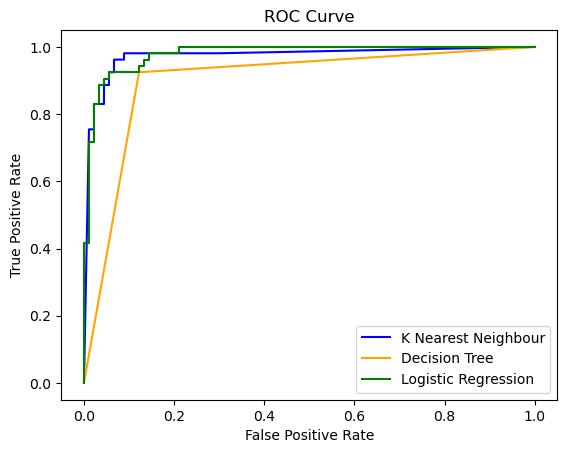

In [92]:
plt.plot(fpr_knn, tpr_knn, c='blue', label="K Nearest Neighbour")
plt.plot(fpr_dt, tpr_dt, c='orange', label="Decision Tree")
plt.plot(fpr_lr, tpr_lr, c='green', label="Logistic Regression")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [93]:
print("accuracy score: ", accuracy_score(y_test, lr_y_predict))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, lr_y_predict))
print("kappa score: ", cohen_kappa_score(y_test, lr_y_predict))
print("precision: ", precision_score(y_test, lr_y_predict, pos_label="M"))
print("recall: ", recall_score(y_test, lr_y_predict, pos_label="M"))
print("f1 score: ", f1_score(y_test, lr_y_predict, pos_label="M"))
print("AUC score: ", auc(fpr_lr, tpr_lr))

accuracy score:  0.9370629370629371
balanced accuracy score:  0.930607966457023
kappa score:  0.8645690834473324
precision:  0.9230769230769231
recall:  0.9056603773584906
f1 score:  0.9142857142857143
AUC score:  0.9788259958071279


In [94]:
print("accuracy score: ", accuracy_score(y_test, lr_y_predict_tuned))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, lr_y_predict_tuned))
print("kappa score: ", cohen_kappa_score(y_test, lr_y_predict_tuned))
print("precision: ", precision_score(y_test, lr_y_predict_tuned, pos_label="M"))
print("recall: ", recall_score(y_test, lr_y_predict_tuned, pos_label="M"))
print("f1 score: ", f1_score(y_test, lr_y_predict_tuned, pos_label="M"))
print("AUC score: ", auc(fpr_lr, tpr_lr))

accuracy score:  0.9020979020979021
balanced accuracy score:  0.9144654088050315
kappa score:  0.7979818365287589
precision:  0.8095238095238095
recall:  0.9622641509433962
f1 score:  0.8793103448275862
AUC score:  0.9788259958071279


In [95]:
dummy_model = DummyClassifier(strategy='constant', constant="B")
dummy_model.fit(X_train, y_train)

DummyClassifier(constant='B', strategy='constant')

In [96]:
# Original predicted values by the model

dummy_prob = dummy_model.predict_proba(X_test)
dummy_y_predict = dummy_model.predict(X_test)
dummy_y_predict

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype='<U1')

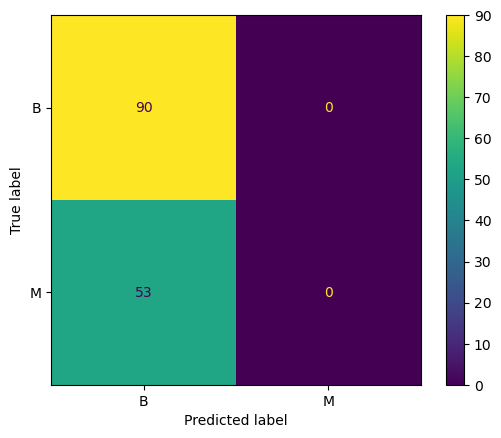

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, dummy_y_predict)
plt.show()

In [98]:
dummy_prob[:15]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [99]:
dummy_results = pd.DataFrame({"actual": y_test, "predicted": dummy_y_predict, "prob_M": dummy_prob[:,1], 
                            "prob_B": dummy_prob[:,0]})
dummy_results[:5]

,actual,predicted,prob_M,prob_B
60,B,B,0.0,1.0
523,B,B,0.0,1.0
261,M,B,0.0,1.0
342,B,B,0.0,1.0
480,B,B,0.0,1.0


In [100]:
fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_test, dummy_results.prob_M, pos_label="M")
fpr_dummy, tpr_dummy, thresholds_dummy

(array([0., 1.]), array([0., 1.]), array([1., 0.]))

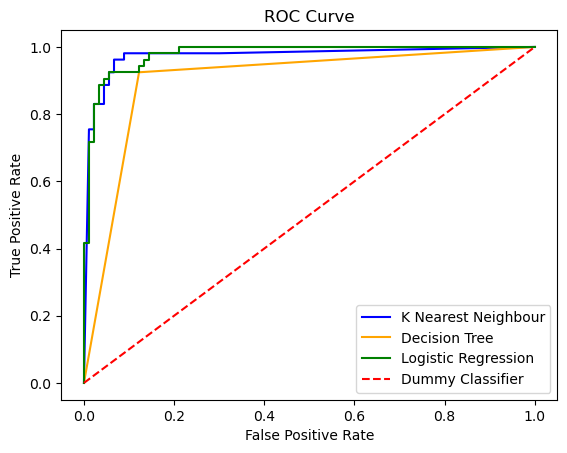

In [101]:
plt.plot(fpr_knn, tpr_knn, c='blue', label="K Nearest Neighbour")
plt.plot(fpr_dt, tpr_dt, c='orange', label="Decision Tree")
plt.plot(fpr_lr, tpr_lr, c='green', label="Logistic Regression")
plt.plot(fpr_dummy, tpr_dummy, c='red', label="Dummy Classifier", ls='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [102]:
print("accuracy score: ", accuracy_score(y_test, dummy_y_predict))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, dummy_y_predict))
print("kappa score: ", cohen_kappa_score(y_test, dummy_y_predict))
print("precision: ", precision_score(y_test, dummy_y_predict, pos_label="M"))
print("recall: ", recall_score(y_test, dummy_y_predict, pos_label="M"))
print("f1 score: ", f1_score(y_test, dummy_y_predict, pos_label="M"))
print("AUC score: ", auc(fpr_dummy, tpr_dummy))

accuracy score:  0.6293706293706294
balanced accuracy score:  0.5
kappa score:  0.0
precision:  0.0
recall:  0.0
f1 score:  0.0
AUC score:  0.5


In [103]:
print("K Neighbours AUC score: ", auc(fpr_knn, tpr_knn))
print("Decision Tree AUC score: ", auc(fpr_dt, tpr_dt))
print("Logistic Regression AUC score: ", auc(fpr_lr, tpr_lr))
print("Dummy Classifier AUC score: ", auc(fpr_dummy, tpr_dummy))

K Neighbours AUC score:  0.9730607966457023
Decision Tree AUC score:  0.9011530398322851
Logistic Regression AUC score:  0.9788259958071279
Dummy Classifier AUC score:  0.5
